In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

Bisecting k-Means (http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf) is a divisive, top-down, clustering algorithm that combines hierarchical clustering with k-Means.

It works by assigning a single cluster which include all the observations in the dataset and then:
    1 - Divide the largest cluster into two smaller sub-clusters using k-Means.
    2 - Redo step 1 i times and choose the best solution by SSE
    3 - Repeat until there are the desired number of clusters

In [18]:
def bkmeans(X, k: int, i: int = 10):
  #every element belong to the same cluster
  cluster = np.zeros(X.shape[0], dtype=int)

  #create k clusters
  for nb_clusters in range(k-1):
    #label of greatest cluster
    greatest_cluster = np.argmax(np.bincount(cluster))

    SSE = np.inf

    subcluster = X[greatest_cluster == cluster]
    
    for _ in range(i):
      #divide the largest cluster into two sub-clusters
      kmeans = KMeans(2, n_init=1).fit(subcluster)

      #pick best solution by SSE
      if (kmeans.inertia_ < SSE):
        labels_subcluster = kmeans.labels_
        SSE = kmeans.inertia_

    #relable greatest subcluster to next unused integer
    labels_subcluster = [nb_clusters + 1 if label == np.argmax(np.bincount(labels_subcluster)) else greatest_cluster for label in labels_subcluster]

    #update cluster with subcluster
    for j, element in enumerate(cluster):
      if (element == greatest_cluster):
        cluster[j] = labels_subcluster.pop(0)

  return cluster

To test the bkmeans implementation we generate a dataset of Gaussian blobs

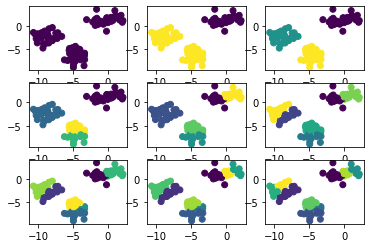

In [19]:
if __name__ == "__main__":
  #generate isotropic Gaussian blobs for clustering.
  X = datasets.make_blobs()[0]

  for i in range(1, 10):
    y = bkmeans(X, i)

    plt.subplot(3,3,i)
    plt.scatter(*zip(*X), c=y)

  plt.show()